In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from matplotlib import pyplot

In [4]:
#1. Load Data
iris = datasets.load_iris()
# Predictors:  Sepal Width, Petal Length, Petal Width
predictors_vals = np.array([predictor[1:4] for predictor in iris.data])
#Target : Sepal Length
target_vals = np.array([predictor[0] for predictor in iris.data])

In [5]:
#2. Split data into train/test = 80%/20%

predictors_vals_train, predictors_vals_test, target_vals_train, target_vals_test= train_test_split(predictors_vals, target_vals, test_size=0.2, random_state=12)
# 3. Normalize if needed

# 4.Initialize placeholders that will contain predictors and target
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

#5. Create variables (Weight and Bias) that will be tuned up
hidden_layer_nodes = 10
#For first layer
A1 = tf.Variable(tf.ones(shape=[3,hidden_layer_nodes])) # inputs -> hidden nodes
b1 = tf.Variable(tf.ones(shape=[hidden_layer_nodes]))   # one biases for each hidden node
#For second layer
A2 = tf.Variable(tf.ones(shape=[hidden_layer_nodes,1])) # hidden inputs -> 1 output
b2 = tf.Variable(tf.ones(shape=[1]))   # 1 bias for the output


In [6]:
# 6. Define Model Structure
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))

# 7. Declare loss function (MSE) and optimizer
loss = tf.reduce_mean(tf.square(y_target - final_output))
my_opt = tf.train.AdamOptimizer(0.02) # learning rate = 0.02
train_step = my_opt.minimize(loss)

# 8.Initialize variables and session
init = tf.global_variables_initializer()
# Create graph session 
sess = tf.Session()
sess.run(init)

In [7]:
# 9. Training loop
lossArray = []
test_loss = []
batch_size =20
for i in range(500):
    batchIndex = np.random.choice(len(predictors_vals_train), size=batch_size)
    batchX = predictors_vals_train[batchIndex]
    batchY = np.transpose([target_vals_train[batchIndex]])
    sess.run(train_step, feed_dict={x_data: batchX, y_target: batchY})
    #
    batchLoss = sess.run(loss, feed_dict={x_data: batchX, y_target: batchY})
    lossArray.append(np.sqrt(batchLoss))
    
    test_temp_loss = sess.run(loss, feed_dict={x_data: predictors_vals_test, y_target: np.transpose([target_vals_test])})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i+1)%50==0:
        print('Loss = ' + str(batchLoss))




Loss = 84.4806
Loss = 6.10376
Loss = 2.37448
Loss = 0.801453
Loss = 0.752302
Loss = 0.705821
Loss = 0.89946
Loss = 0.371663
Loss = 0.494008
Loss = 0.355626


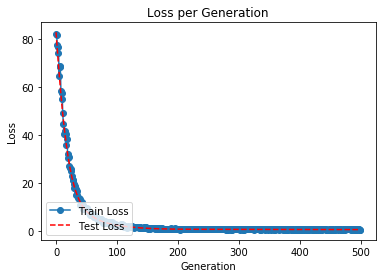

In [8]:
# 10. Check model performance
    #Plot loss(mean squared error) over time
pyplot.plot(lossArray, 'o-', label='Train Loss')
pyplot.plot(test_loss, 'r--', label='Test Loss')
pyplot.title('Loss per Generation')
pyplot.legend(loc='lower left')
pyplot.xlabel('Generation')
pyplot.ylabel('Loss')
pyplot.show()
